In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy
import xml.etree.ElementTree as ET
from glob import glob
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Liulin

In [47]:
filename = './data/ABSjets/liulin/1711291041.y14'
filename = './data/0701010003.y14'
#filename = './data/ABSjets/liulin/1711291046.y10'
#filename = './data/ABSjets/liulin/1710271428.y07'

# extract time
path = filename.split('/')
time = path[-1].split('.')
print time
date_object = datetime.datetime.strptime(time[0], '%y%m%d%H%M')
print date_object

# read data
liulin = pd.read_csv(filename, header = None, sep = ' ', skiprows = 1) # read Liulin data Y
liulin = liulin.drop(256, axis=1) # delete last empty column
infile = open(filename, 'r')
header = infile.readline()
print header # print data header
exposition = header.split(' ')[4].split('[')[0] # extract exposition time  
exposition_val = float(exposition)
exposition += 'S'
print exposition

# compute time series
#dates = pd.date_range(date_object, freq='5T', periods=len(liulin)).tolist()


['0701010003', 'y14']
2007-01-01 00:03:00
MDU-14  EXPOSITION = 10[sec]

10S


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0,'Time')

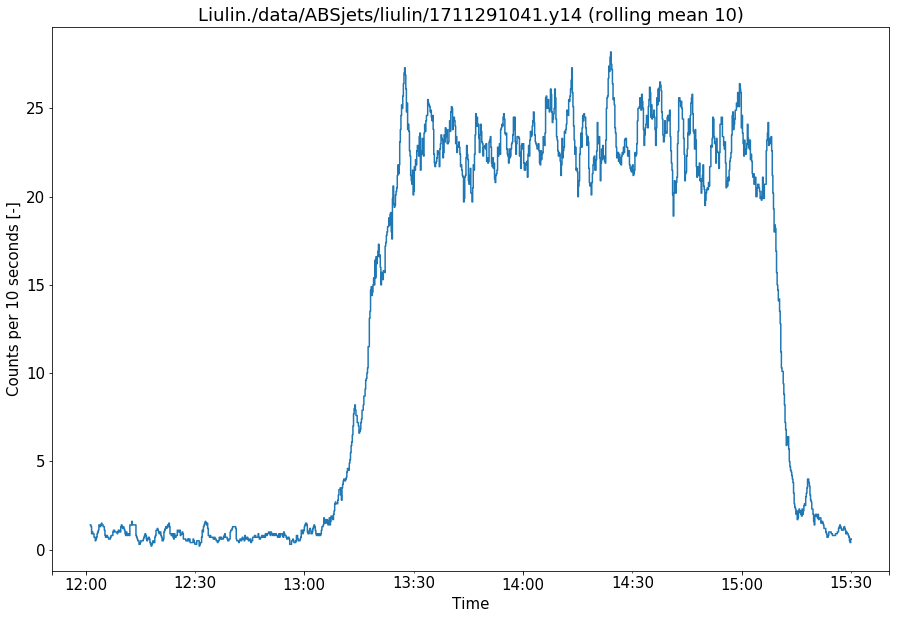

In [7]:
#liulin_data = pd.DataFrame(index = pd.date_range(date_object, freq='5T', periods=len(liulin)).tolist(), data = liulin.as_matrix())
# index liulin data (compute time)
liulin_data = pd.DataFrame(index = pd.date_range(date_object, freq=exposition, periods=len(liulin)).tolist(), data = liulin.as_matrix())
liulin_data['flux'] = liulin_data[range(0,256)].sum(axis=1)
#liulin_data = liulin_data.loc['2018-08-02 17:00:00':'2018-08-03 13:00:00']
#ABSjets liulin_data = liulin_data.loc['2017-11-29 12:00:00':'2017-11-29 15:30:00']
liulin_data = liulin_data.loc['2017-11-29 12:00:00':'2017-11-29 15:30:00']

WINDOW = 10
liulin_data['flux'] = liulin_data['flux'].rolling(WINDOW).mean()
liulin_data['flux'] = liulin_data['flux'] 

#liulin_data
plt.figure(figsize=(15, 10))
matplotlib.rcParams.update({'font.size': 15})
liulin_data['flux'].plot(drawstyle='steps')
plt.title('Liulin' + filename + ' (rolling mean ' + str(WINDOW) + ')')
plt.ylabel('Counts per 10 seconds [-]')
plt.xlabel('Time')
#plt.ylim(0, 20)


## AIRDOS

In [8]:
fto = './data/ABSjets/T4/DATALOG.TXT' #  File to Open
#fto = './data/ABSjets/A005/DATALOG.TXT' #  File to Open

l=[]
l.extend(range(0,520))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*',engine='python')

#
''' DEBUG
df = df.reset_index(drop=True)
df.drop(df[df.index > 100].index, inplace=True)
'''#'''

df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
#df.drop(df[df[0]=='$CANDY'].index, inplace=True)

# Convert strings to numbers
#df = df.apply(pd.to_numeric, errors='ignore')

#df.iloc[:,0:13]

#df

In [9]:
date = np.nan #pd.to_datetime('210317000000.00', format='%d%m%y%H%M%S.%f')
altitude = np.nan
LatDD = np.nan
LonDD = np.nan
speed = np.nan
flag=0

for i,r in df.iterrows():
    if (r[0] == '$GPRMC'):
        date = pd.to_datetime(str(r[9])+str(r[1]), format='%d%m%y%H%M%S.%f',errors='coerce')
        flag = 1
        speed = r[7]
        
    if (r[0] == '$GPGGA'):
        altitude = r[9]

    df.set_value(i,'date',date)
    #df.set_value(i,'altitude',np.nan)
    df.set_value(i,'altitude',altitude)
    df.set_value(i,'speed',speed)

    if (r[0] == '$CANDY'):
        date = date + pd.Timedelta(seconds=14)
        df.set_value(i,'date',date)
        #if (flag==1):
        #    df.set_value(i,'altitude',altitude)
        #    flag=0
        
dfo = df
#dfo.reset_index(inplace=True)
dfo.drop(dfo[dfo[0]=='$GPRMC'].index, inplace=True)
dfo.drop(dfo[dfo[0]=='$GPGGA'].index, inplace=True)

dfo.to_csv('radiation.csv')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


## Liulin & AIRDOS flux

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


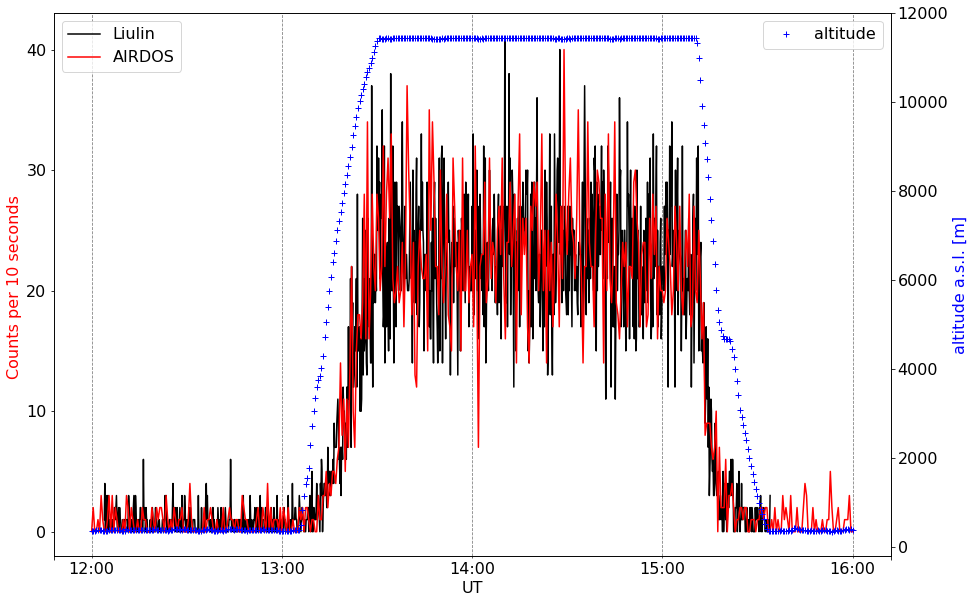

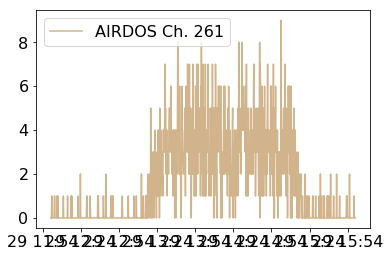

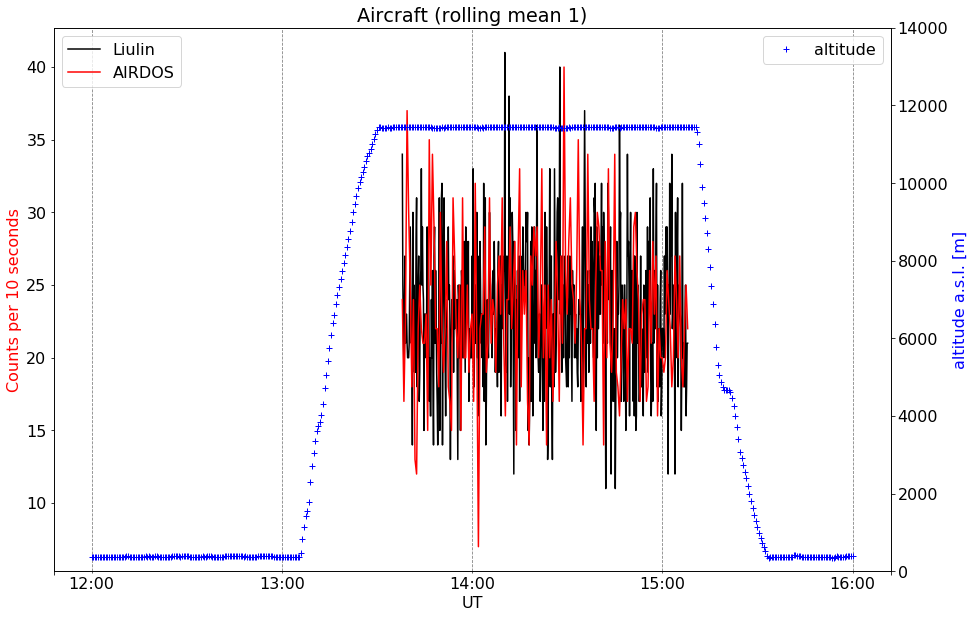

In [11]:
dfo = pd.read_table('radiation.csv', sep=',', header=0)
#dfo = dfo.dropna(how='any')
dfo = dfo.dropna(subset=['date'])
dfo['date'] = pd.to_datetime(dfo['date'])
dfo = dfo.set_index(['date'])
xx = dfo.loc['2017-11-29 12:00:00':'2017-11-29 16:00:00']
#xx = dfo

xxl = liulin_data.loc['2017-11-29 12:00:00':'2017-11-29 16:00:00']
xxl.index = xxl.index + pd.Timedelta('4 min') # Correction of Liulin Time

NOISE_LEVEL=261
#NOISE_LEVEL=269
LAST_CHANNEL=515
#xx['flux'] = xx[range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1)
#liulin_data['flux'] = liulin_data[range(3,256)].sum(axis=1)
#xxl['flux'] = xxl[range(0,256)].sum(axis=1)

xx['flux'] = xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1)
xxl['flux'] = xxl.iloc[:,range(0,256)].sum(axis=1)


xxs = xx.resample('30 s', how='sum')
xxm = xx.resample('30 s', how='mean')

#pandas.rolling_mean(arg, window, min_periods=None, freq=None, center=False, how=None, **kwargs)
WINDOW = 1
#xxs['flux'] = pd.rolling_mean(xxs['flux'],WINDOW)
#xxl['flux'] = pd.rolling_mean(liulin_data['flux'],WINDOW)

plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 16})

xxl['flux'].plot(c='black', label = 'Liulin') # drawstyle='steps', 
xxs['flux'].plot(c='red', label = 'AIRDOS')
#plt.plot(xx.iloc[:,NOISE_LEVEL],c='tan',label='AIRDOS 1. Ch.',zorder=1)

#plt.ylim([0,11])

plt.xlabel('UT')
plt.ylabel('Counts per 10 seconds ', color='red')
plt.legend(loc=2)

plt.grid(b=True, which='major', color='grey', linestyle='')
plt.grid(b=True, which='minor', color='grey', linestyle='--')

ax = plt.twinx()

#plt.ylim([0,14000])
xxm['altitude'].plot(c='b', marker='+', linewidth='2', linestyle='none', label='altitude')
#xx['altitude'].plot(c='b', label='alt', linewidth='1')
plt.ylabel('altitude a.s.l. [m]', color='b')

plt.grid(b=True, which='major', color='grey', linestyle='')
plt.grid(b=True, which='minor', color='grey', linestyle='')
plt.legend()
#plt.title('Aircraft (rolling mean ' + str(WINDOW) + ')')

plt.savefig("aircraft.pdf", format="pdf")

#
'''flux to file
xxx = pd.DataFrame()
xxx = xx[['altitude','flux','speed']]
xxx.to_csv('flux.csv')
#'''

plt.figure()
#matplotlib.rcParams.update({'font.size': 10})
plt.plot(xx.iloc[:,NOISE_LEVEL],c='tan',label='AIRDOS Ch. '+str(NOISE_LEVEL),zorder=1)
plt.legend()


xxxl = xxl.loc['2017-11-29 13:38:00':'2017-11-29 15:08:00']
xxxs = xxs.loc['2017-11-29 13:38:00':'2017-11-29 15:08:00']


plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 16})

xxxl['flux'].plot(c='black', label = 'Liulin') # drawstyle='steps', 
xxxs['flux'].plot(c='red', label = 'AIRDOS')
#plt.plot(xx.iloc[:,NOISE_LEVEL],c='tan',label='AIRDOS 1. Ch.',zorder=1)

#plt.ylim([0,160])

plt.xlabel('UT')
plt.ylabel('Counts per 10 seconds', color='red')
plt.legend(loc=2)

plt.grid(b=True, which='major', color='grey', linestyle='')
plt.grid(b=True, which='minor', color='grey', linestyle='--')

ax = plt.twinx()

plt.ylim([0,14000])
xxm['altitude'].plot(c='b', marker='+', linewidth='2', linestyle='none', label='altitude')
#xx['altitude'].plot(c='b', label='alt', linewidth='1')
plt.ylabel('altitude a.s.l. [m]', color='b')

plt.grid(b=True, which='major', color='grey', linestyle='')
plt.grid(b=True, which='minor', color='grey', linestyle='')
plt.legend()
plt.title('Aircraft (rolling mean ' + str(WINDOW) + ')')

plt.savefig("aircraft2.svg", format="svg")


## Spectra

11353
0.04943820224719103 -12.595505617977535


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



(0.1, 13)

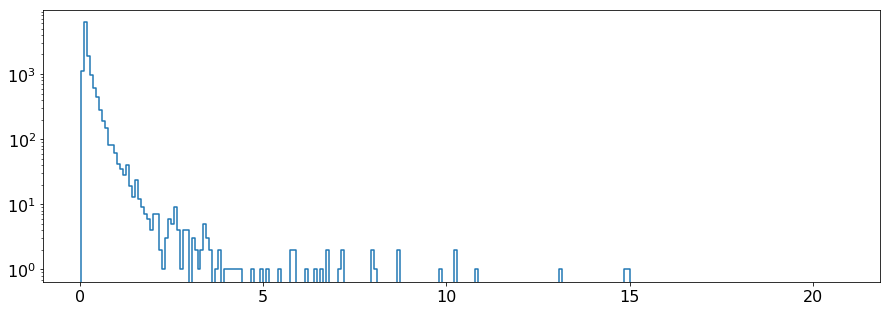

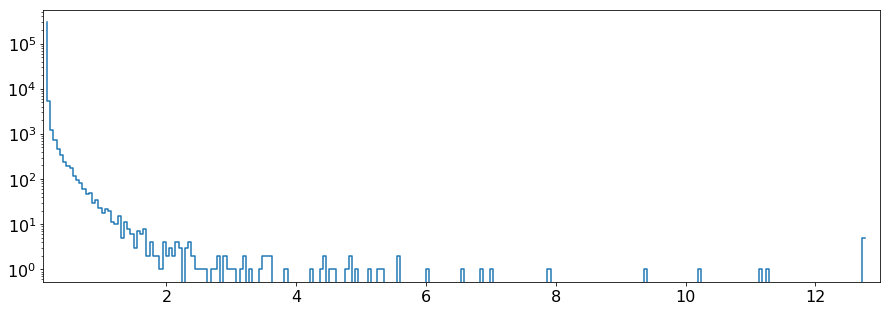

In [41]:
import plotly.plotly as py
import plotly.graph_objs as go

# Liulin

e1 = ['2017-11-29 13:38:00','2017-11-29 15:08:00']

ener1 = liulin_data.ix[e1[0]:e1[1],0:256].sum()

print ener1[2:].sum()

ee = pd.DataFrame()
ee['1'] = ener1
ee['index'] = ener1.index
#e['x'] =  linspace(0.0407, 20.7977, 256)
ee['x'] =  linspace(0.0814/2, 20.7977, 256)

plt.figure(figsize=(15,5))
#ee['1'].plot(drawstyle='steps')
plt.plot(ee['x'],ee['1'],drawstyle='steps')
plt.yscale('log')
#plt.xscale('log')
#plt.xlim(0, 13)

#AIRDOS T4
l = np.array([[275, 1],[364,1]])
r = np.array([1, 5.4])
#AIRDOS A005
#l = np.array([[275+8, 1],[364+8,1]])
#r = np.array([1, 5.4])
#A2
#l = np.array([[393, 1],[505,1]])
#r = np.array([2.45, 4.39])

coef = np.linalg.solve(l,r)
print coef[0], coef[1]


e1 = ['2017-11-29 13:38:00','2017-11-29 15:08:00']

ener1 = dfo.ix[e1[0]:e1[1],259:515].sum()

e = pd.DataFrame()
e['1'] = ener1
e['index'] = pd.to_numeric(ener1.index)
e['x'] = (e['index']) * coef[0] + coef[1]

plt.figure(figsize=(15,5))
#e['1'].plot(drawstyle='steps')
plt.plot(e['x'],e['1'],drawstyle='steps')
plt.yscale('log')
#plt.xscale('log')
plt.xlim(0.1, 13)


In [14]:
# calculation for AIRDOS T4 death time of T4 x1.3672
# calculation of sensor mass: Meier MM, Trompier F, Ambrozova I, Kubancak J, Matthiä D, Ploc O, Santen N, Wirtz M. CONCORD: comparison of cosmic radiation detectors in the radiation field at aviation altitudes. Journal of Space Weather and Space Climate. 2016;6:A24.
# 0.16597 g

from_energy = 0.21 #0#0.21
to_energy = 12 #30#12

e['dose']=e['1']*e['x']
ee['dose']=ee['1']*ee['x']

liulin_particles = ee.loc[(ee['x']>=from_energy)]['1'].sum()
airdos_particles = e.loc[(e['x']>=from_energy)]['1'].sum()

liulin_dose = ee.loc[(ee['x']>=from_energy)&(ee['x']<=to_energy)]['dose'].sum()
airdos_dose = e.loc[(e['x']>=from_energy)&(e['x']<=to_energy)]['dose'].sum()

deathtime_correction = liulin_particles/airdos_particles

print 'Liulin','AIRDOS'
print liulin_particles, airdos_particles
print liulin_particles/(airdos_particles/100),'%'
print liulin_dose, 'MeV', airdos_dose, 'MeV'
print liulin_dose/(airdos_dose/100),'%'
print deathtime_correction, airdos_dose*1.3                                            
print round(((1.60218e-19 * liulin_dose * 1e6) / 1.6597e-4) * 1e6,2), 'uGy', round(((1.60218e-19 * airdos_dose * 1e6) / 1.615e-4) * 1e6,2), 'uGy', round(((1.60218e-19 * airdos_dose * 1.3 * 1e6) / 1.615e-4) * 1e6,2), 'uGy'

Liulin AIRDOS
5131 4172.0
122.98657718120806 %
2776.3098 MeV 2052.577528089881 MeV
135.2596801828782 %
1.2298657718120805 2668.3507865168453
2.68 uGy 2.04 uGy 2.65 uGy


Liulin AIRDOS
12470 303639.0
4.106850569261525 %
4221.973799999999 MeV 50156.82921348255 MeV
8.417545259948568 %
0.04106850569261524 65203.87797752732
4.08 uGy 49.76 uGy 64.69 uGy


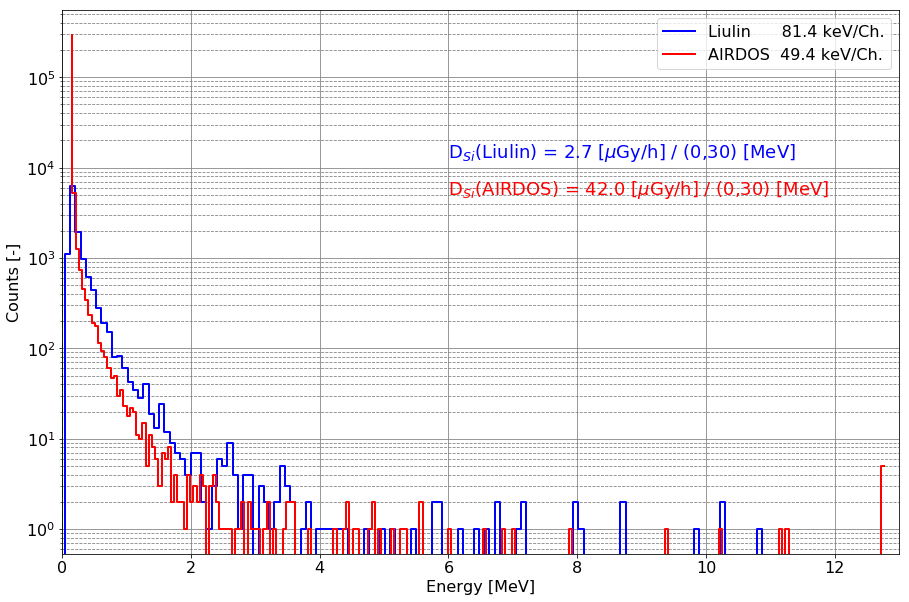

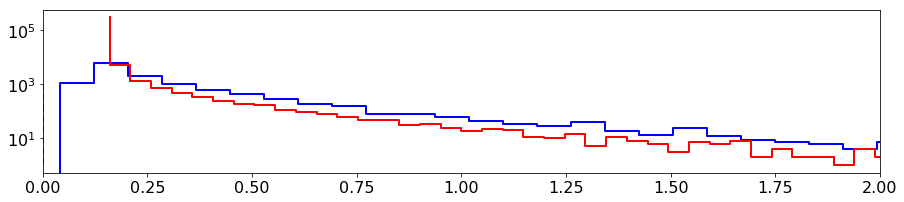

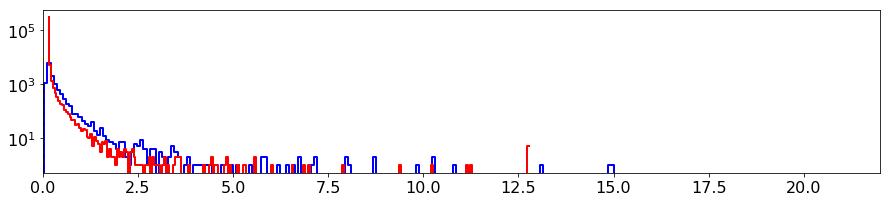

In [44]:
# calculation for AIRDOS T4 death time of T4 x1.3672
# calculation of sensor mass: Meier MM, Trompier F, Ambrozova I, Kubancak J, Matthiä D, Ploc O, Santen N, Wirtz M. CONCORD: comparison of cosmic radiation detectors in the radiation field at aviation altitudes. Journal of Space Weather and Space Climate. 2016;6:A24.
# 0.16597 g

m = 0.16597e-3 # [kg] (DLR)
#m = 0.1398e-3 # [kg]

from_energy = 0#.21 #0.21 [MeV]
to_energy = 30 #12.0 [MeV]

e['dose']=e['1']*e['x']
ee['dose']=ee['1']*ee['x']

liulin_particles = ee.loc[(ee['x']>=from_energy)]['1'].sum()
airdos_particles = e.loc[(e['x']>=from_energy)]['1'].sum()

liulin_dose = ee.loc[(ee['x']>=from_energy)&(ee['x']<=to_energy)]['dose'].sum()
airdos_dose = e.loc[(e['x']>=from_energy)&(e['x']<=to_energy)]['dose'].sum()

deathtime_correction = liulin_particles/airdos_particles

print 'Liulin','AIRDOS'
print liulin_particles, airdos_particles
print liulin_particles/(airdos_particles/100),'%'
print liulin_dose, 'MeV', airdos_dose, 'MeV'
print liulin_dose/(airdos_dose/100),'%'
print deathtime_correction, airdos_dose*1.3                                            
print round(((1.60218e-19 * liulin_dose * 1e6) / 1.6597e-4) * 1e6,2), 'uGy', round(((1.60218e-19 * airdos_dose * 1e6) / 1.615e-4) * 1e6,2), 'uGy', round(((1.60218e-19 * airdos_dose * 1.3 * 1e6) / 1.615e-4) * 1e6,2), 'uGy'
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(15,10))

plt.plot(ee['x'],ee['1'], c='b', lw=2, drawstyle='steps-pre', label='Liulin      81.4 keV/Ch.')
plt.plot(e['x'],e['1'], c='r', lw=2, drawstyle='steps-pre', label='AIRDOS  49.4 keV/Ch.')

plt.plot((from_energy,from_energy),(1,1000), lw=2, linestyle='--', c='green')
plt.plot((to_energy,to_energy),(1,1000), lw=2, linestyle='--', c='green')

#plt.ylim(1, 10e6)
plt.xlim(0, 13)
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts [-]')
plt.legend()
#plt.title('Aircraft')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='--')
#plt.savefig("aircraft_spectra.pdf", format="pdf", bbox_inches='tight')

plt.text(6, 13000, r'D$_S$$_i$(Liulin) = ' + str(round(((1.60218e-19 * liulin_dose * 1e6) / m) * 1e6 / 1.5,1)) + r' [$\mu$Gy/h] / (' + str(from_energy) + ',' + str(to_energy) + ') [MeV]', fontsize=18, color='b')
# Death time for AIRDOS: 65535 measurements = 10.24 s
plt.text(6, 5000, r'D$_S$$_i$(AIRDOS) = ' + str(round(((1.60218e-19 * airdos_dose * 1.3 * 1e6) / m) * 1e6 / 1.5,1)) + r' [$\mu$Gy/h] / (' + str(from_energy) + ',' + str(to_energy) + ') [MeV]', fontsize=18, color='r')
#plt.text(6, 5000, r'D$_S$$_i$(AIRDOS) = ' + str(round(((1.60218e-19 * airdos_dose * 1 * 1e6) / m) * 1e6,2)) + r' [$\mu$Gy] / (' + str(from_energy) + ',' + str(to_energy) + ') [MeV]', fontsize=18, color='r')

plt.figure(figsize=(15,3))
plt.yscale('log')
plt.xlim(0, 2)
plt.plot(ee['x'],ee['1'], c='b', lw=2, drawstyle='steps-pre', label='Liulin      81.4 keV/Ch.')
plt.plot(e['x'],e['1'], c='r', lw=2, drawstyle='steps-pre', label='AIRDOS  49.4 keV/Ch.')
plt.plot((from_energy,from_energy),(1,1000), lw=2, linestyle='--', c='green')

plt.figure(figsize=(15,3))
plt.yscale('log')
plt.xlim(0, 22)
plt.plot(ee['x'],ee['1'], c='b', lw=2, drawstyle='steps-pre', label='Liulin      81.4 keV/Ch.')
plt.plot(e['x'],e['1'], c='r', lw=2, drawstyle='steps-pre', label='AIRDOS  49.4 keV/Ch.')
plt.plot((from_energy,from_energy),(1,1000), lw=2, linestyle='--', c='green')
plt.plot((to_energy,to_energy),(1,1000), lw=2, linestyle='--', c='green')


In [23]:
# integration time
print dfo.loc['2017-11-29 13:38:00':'2017-11-29 15:08:00'].shape[0] * 10.24, 's'


3819.52 s


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).mean()



"flux to file\nxxx = pd.DataFrame()\nxxx = xx[['altitude','flux','speed']]\nxxx.to_csv('flux.csv')\n#"

<Figure size 1080x720 with 0 Axes>

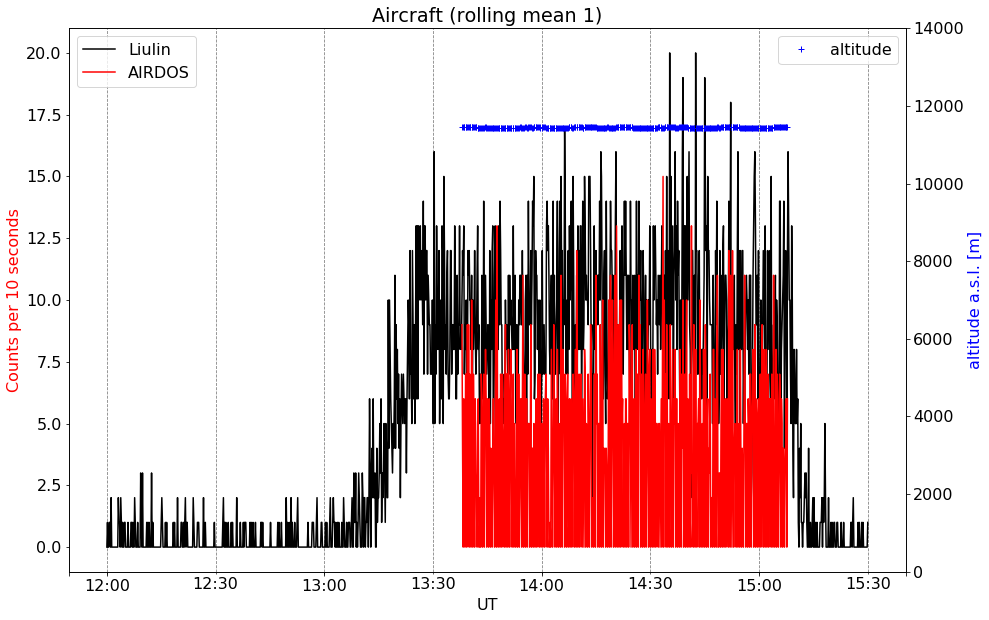

In [17]:
#DeviceName = 'AIRDOS A005'
DeviceName = 'AIRDOS T4'
plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 16})

dfo = pd.read_table('radiation.csv', sep=',', header=0)
#dfo = dfo.dropna(how='any')
dfo = dfo.dropna(subset=['date'])
dfo['date'] = pd.to_datetime(dfo['date'])
dfo = dfo.set_index(['date'])
xx = dfo.loc['2017-11-29 13:38:00':'2017-11-29 15:08:00']
#xx = dfo

xxl = liulin_data.loc['2017-11-29 12:00:00':'2017-11-29 16:00:00']
#xxl.index = xxl.index + pd.Timedelta('40 min') # Correction of Liulin Time

NOISE_LEVEL=263
LAST_CHANNEL=515
xx['flux'] = xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1)
liulin_data['flux'] = liulin_data.iloc[:,range(3,256)].sum(axis=1)

xxs = xx.resample('10 s', how='sum')
xxm = xx.resample('10 s', how='mean')

#pandas.rolling_mean(arg, window, min_periods=None, freq=None, center=False, how=None, **kwargs)
WINDOW = 1
#xxs['flux'] = pd.rolling_mean(xxs['flux'],WINDOW)
#xxl['flux'] = pd.rolling_mean(xxl['flux'],WINDOW)

plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 16})

xxl['flux'].plot(c='black', label = 'Liulin') # drawstyle='steps', 
xxs['flux'].plot(c='red', label = 'AIRDOS')
#plt.plot(xx.iloc[:,NOISE_LEVEL],c='tan',label='AIRDOS 1. Ch.',zorder=1)

#plt.ylim([0,160])

plt.xlabel('UT')
plt.ylabel('Counts per 10 seconds', color='red')
plt.legend(loc=2)

plt.grid(b=True, which='major', color='grey', linestyle='')
plt.grid(b=True, which='minor', color='grey', linestyle='--')

ax = plt.twinx()

plt.ylim([0,14000])
xxm['altitude'].plot(c='b', marker='+', linewidth='2', linestyle='none', label='altitude')
#xx['altitude'].plot(c='b', label='alt', linewidth='1')
plt.ylabel('altitude a.s.l. [m]', color='b')

plt.grid(b=True, which='major', color='grey', linestyle='')
plt.grid(b=True, which='minor', color='grey', linestyle='')
plt.legend()
plt.title('Aircraft (rolling mean ' + str(WINDOW) + ')')

plt.savefig("aircraft2.svg", format="svg")

#
'''flux to file
xxx = pd.DataFrame()
xxx = xx[['altitude','flux','speed']]
xxx.to_csv('flux.csv')
#'''


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:21: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).mean()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/

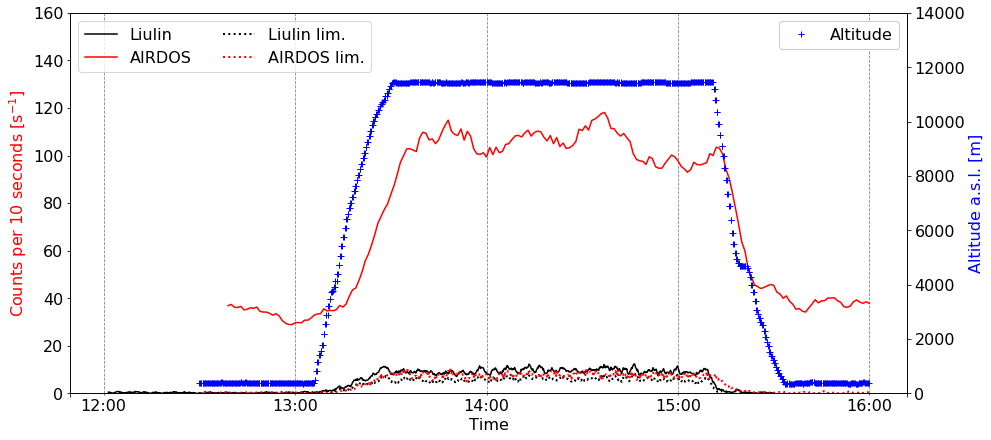

In [25]:
dfo = pd.read_table('radiation.csv', sep=',', header=0)
#dfo = dfo.dropna(how='any')
dfo = dfo.dropna(subset=['date'])
dfo['date'] = pd.to_datetime(dfo['date'])
dfo = dfo.set_index(['date'])
#xx = dfo.loc['2018-01-03 17:00:00':]
#xx = dfo.loc['2018-06-23 11:00:00':'2018-06-27 10:00:00']
xx = dfo.loc['2017-11-29 12:30:00':'2017-11-29 16:00:00']
#xx = dfo

xxl = liulin_data

#------------------------
NOISE_LEVEL=260
LAST_CHANNEL=515
xx['flux'] = xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1)
liulin_data['flux'] = liulin_data.iloc[:,range(3,256)].sum(axis=1)


xxs = xx.resample('1 min', how='sum')
xxm = xx.resample('1 min', how='mean')

#pandas.rolling_mean(arg, window, min_periods=None, freq=None, center=False, how=None, **kwargs)
WINDOW = 10
xxs['flux'] = xxs['flux'].rolling(WINDOW).mean()
xxl['flux'] = liulin_data['flux'].rolling(WINDOW).mean()

plt.figure(figsize=(15,7))
matplotlib.rcParams.update({'font.size': 16})

xxl['flux'].plot(c='black', label = 'Liulin') # drawstyle='steps', 
xxs['flux'].plot(c='red', label = 'AIRDOS')

#------------------------
NOISE_LEVEL=261
LAST_CHANNEL=515
xx['flux'] = xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1)
liulin_data['flux'] = liulin_data.iloc[:,range(4,256)].sum(axis=1)

xxs = xx.resample('10 s', how='sum')
xxm = xx.resample('10 s', how='mean')

#pandas.rolling_mean(arg, window, min_periods=None, freq=None, center=False, how=None, **kwargs)
WINDOW = 10
xxs['flux'] = xxs['flux'].rolling(WINDOW).mean()
xxl['flux'] = liulin_data['flux'].rolling(WINDOW).mean()

xxl['flux'].plot(c='black', lw=2, linestyle=':', label = 'Liulin lim.') # drawstyle='steps', 
xxs['flux'].plot(c='red', lw=2, linestyle=':', label = 'AIRDOS lim.')

plt.ylim([0,160])

plt.xlabel('Time')
plt.ylabel(r'Counts per 10 seconds [s$^{-1}$]', color='red')
#plt.legend(loc=2, framealpha=1)
plt.legend(loc="upper left", bbox_to_anchor=[0, 1], ncol=2)

plt.grid(b=True, which='major', color='grey', linestyle='')
plt.grid(b=True, which='minor', color='grey', linestyle='--')

ax = plt.twinx()

plt.ylim([0,14000])
xxm['altitude'].plot(c='b', marker='+', linewidth='2', linestyle='none', label='Altitude',zorder=99)
#xx['altitude'].plot(c='b', label='alt', linewidth='1')
plt.ylabel('Altitude a.s.l. [m]', color='b')

plt.grid(b=True, which='major', color='grey', linestyle='')
plt.grid(b=True, which='minor', color='grey', linestyle='')
plt.legend(framealpha=1)
#plt.title('Aircraft (rolling mean ' + str(WINDOW) + ')')

plt.savefig("aircraft.pdf", format="pdf", bbox_inches='tight')



In [342]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

ee = pd.read_table('./data/liulin.csv', sep=',', header=0,engine='python' )
eee = pd.read_table('./data/liulin2.csv', sep=',', header=0,engine='python' )

# Solving following system of linear equations
# 237a + b = 6.12
# 215a + b = 5.49
tl = 0.5
#l = np.array([[41, 1],[62,1]])
#r = np.array([1.02, 1.41])
#AIRDOS T4
l = np.array([[275, 1],[364,1]])
r = np.array([1, 5.4])
#A2
#l = np.array([[393, 1],[505,1]])
#r = np.array([2.45, 4.39])

coef = np.linalg.solve(l,r)
print coef[0], coef[1]


e1 = ['2017-11-29 13:38:00','2017-11-29 15:08:00']

ener1 = dfo.ix[e1[0]:e1[1],259:515].sum()

e = pd.DataFrame()
e['1'] = ener1
e['index'] = pd.to_numeric(ener1.index)
e['x'] = (e['index']) * coef[0] + coef[1]

data = [
    go.Scatter(
        x=e['x'],
        y=e['1'],
        name='AIRDOS<br>49.4 keV/Ch.',
        #yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=ee['x'],
        y=ee['1'],
        name='Liulin<br>81.4 keV/Ch.',
        #yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=eee['x'],
        y=eee['1'],
        name='Liulin<br>69.2 keV/Ch.',
        #yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    ]
        
layout = go.Layout(
    title='Aircraft',
    font=dict(family='Courier New, monospace', size=18, color='#7f7f7f'),
    yaxis=dict(
        title='counts',
        type='log',
        #range = [0,100]
    ),
    xaxis=dict(
        title='ε [MeV]',
    ),
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='ble')


0.0494382022472 -12.595505618


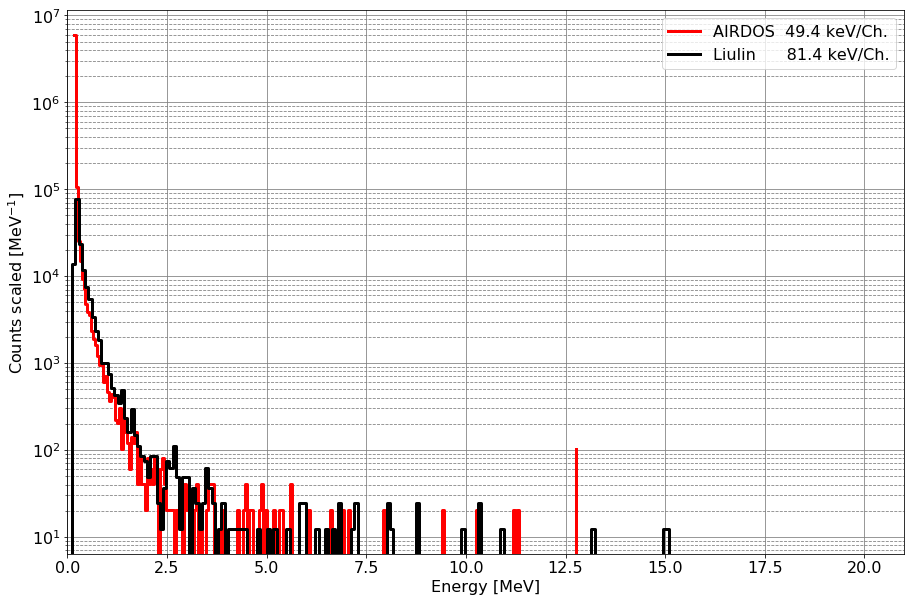

In [77]:
matplotlib.rcParams.update({'font.size': 16})

#from matplotlib import rc
#rc('text', usetex=False)

plt.figure(figsize=(15,10))

e['norm'] = e['1']/0.0494 #/0.0494
ee['norm'] = ee['1']/0.0814 #/0.0692 #/(0.0814/0.0494)
#eee['norm'] = eee['1']/0.0692 #/0.0692 #/(0.0814/0.0494)

plt.plot(e['x'],e['norm'], c='r', lw=3, drawstyle='steps-post', label='AIRDOS  49.4 keV/Ch.')
#plt.plot(ee['x'],ee['norm'], c='grey', linestyle=':', lw=3, drawstyle='steps-post', label='Liulin      81.4 keV/Ch.')
plt.plot(ee['x'],ee['norm'], c='black', lw=3, drawstyle='steps-post', label='Liulin      81.4 keV/Ch.')
#plt.plot(eee['x'],eee['norm'], c='black', lw=3, drawstyle='steps-post', label='Liulin      69.2 keV/Ch.')

#plt.ylim(1, 10e6)
plt.xlim(0, 21)
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts scaled [MeV$^{-1}$]')
plt.legend()
#plt.title('Aircraft')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='--')

plt.savefig("aircraft_spectra.pdf", format="pdf", bbox_inches='tight')
ee.to_csv('./data/liulin_spectrum.csv')
e.to_csv('./data/airdos_spectrum.csv')


In [206]:
#calculation for death time of T4 x1.3672
from_energy = 0.27
to_energy = 12
#e.loc[e['x']>=from_energy]
#ee.loc[ee['x']>=from_energy]
e['dose']=e['1']*e['x']
ee['dose']=ee['1']*ee['x']
eee['dose']=eee['1']*eee['x']

liulin_particles = ee.loc[(ee['x']>=from_energy)]['1'].sum()
liulin_particles2 = eee.loc[(eee['x']>=from_energy)]['1'].sum()
airdos_particles = e.loc[(e['x']>=from_energy)]['1'].sum()

liulin_dose = ee.loc[(ee['x']>=from_energy)&(ee['x']<=to_energy)]['dose'].sum()
liulin_dose2 = eee.loc[(eee['x']>=from_energy)&(eee['x']<=to_energy)]['dose'].sum()
airdos_dose = e.loc[(e['x']>=from_energy)&(e['x']<=to_energy)]['dose'].sum()

deathtime_correction = liulin_particles/airdos_particles

print 'Liulin','AIRDOS'
print liulin_particles, airdos_particles, liulin_particles2
print liulin_particles/(airdos_particles/100),'%', liulin_particles2/(airdos_particles/100),'%'
print liulin_dose, airdos_dose, liulin_dose2
print liulin_dose/(airdos_dose/100),'%', liulin_dose2/(airdos_dose/100),'%'
print deathtime_correction, airdos_dose*1.3672                                               

#Value recorded by Liulin is~11336.9~MeV (in 17382~events), 9.4\% higher than the 10360.6~MeV (in 20523~events) recorded by AIRDOS. 
# 3567.96404494

Liulin AIRDOS
3271 2924.0 2045
111.867305062 % 69.9384404925 %
1776.0666 1730.06067416 1225.38147529
102.659208809 % 70.8288150582 %
1.11867305062 2365.33895371


## Musala

In [207]:
a1 = pd.read_table('./data/Musala/A1_histo.csv', sep=',', header=None,engine='python' )
a2 = pd.read_table('./data/Musala/A2_histo.csv', sep=',', header=None,engine='python' )
liulin = pd.read_table('./data/Musala/liulin_histo.csv', sep=',', header=None,engine='python' )
a1[0]=pd.to_numeric(a1.index)
a1[1]=pd.to_numeric(a1[1])
a2[0]=pd.to_numeric(a2.index)
a2[1]=pd.to_numeric(a2[1])
liulin[0] = pd.to_numeric(liulin.index)+1


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

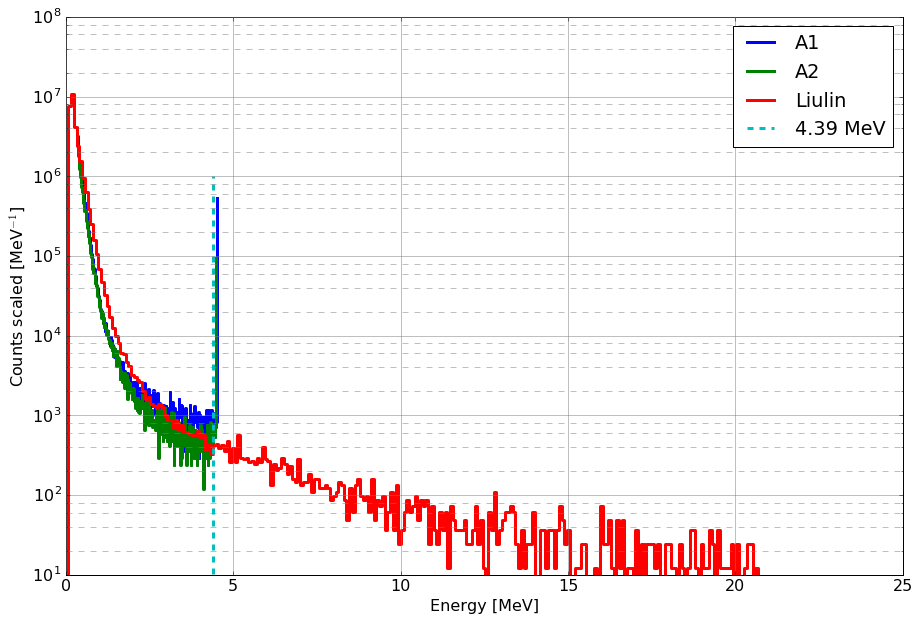

In [208]:
a1x=a1[a1[0]>263]
a2x=a2[a2[0]>265]
a1x.reset_index(inplace=True)
a1x['ch']=pd.to_numeric(a1x.index)
a2x.reset_index(inplace=True)
a2x['ch']=pd.to_numeric(a2x.index)

#ch. 239 is related to 4.39 MeV
a = 0.017 #channel width AIRDOS
b = 4.39 - a * 239

w = 0.0814 #0.0692 #0.0814 #channel width Liulin
#w = 0.0692 #0.0814 #channel width Liulin

a1x['e'] = a * a1x['ch'] + b
a2x['e'] = a * a2x['ch'] + b
liulin['e'] = (liulin[0]) * w - w/2

'''
plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 16})
plt.yscale('log')
plt.plot(a1.loc[266:512,0]-261,a1.loc[266:512,1], label='A1')
plt.plot(a2.loc[266:512,0]-262,a2.loc[266:512,1], label='A2')
plt.plot(liulin[0]+1,liulin[1])
plt.legend()
'''

plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 16})
plt.yscale('log')
#plt.xlim(0, 10)
#plt.plot(a1x['e'],a1x[1]/0.017, label='A1', drawstyle='steps-mid')
#plt.plot(a2x['e'],a2x[1]/0.017, label='A2', drawstyle='steps-mid')
#plt.plot(liulin['e'],liulin[1]/0.069, label='Liulin', drawstyle='steps-mid')
plt.plot(a1x['e'],a1x[1]/a, lw=3, label='A1', drawstyle='steps-mid')
plt.plot(a2x['e'],a2x[1]/a, lw=3, label='A2', drawstyle='steps-mid')
plt.plot(liulin['e'],liulin[1]/w, lw=3, label='Liulin', drawstyle='steps-mid')

line = pd.DataFrame()
line['x']=[4.39,4.39]
line['y']=[0,1e6]
plt.plot(line['x'],line['y'],lw=3, linestyle='--', label='4.39 MeV')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts scaled [MeV$^{-1}$]')
plt.legend()
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='--')


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

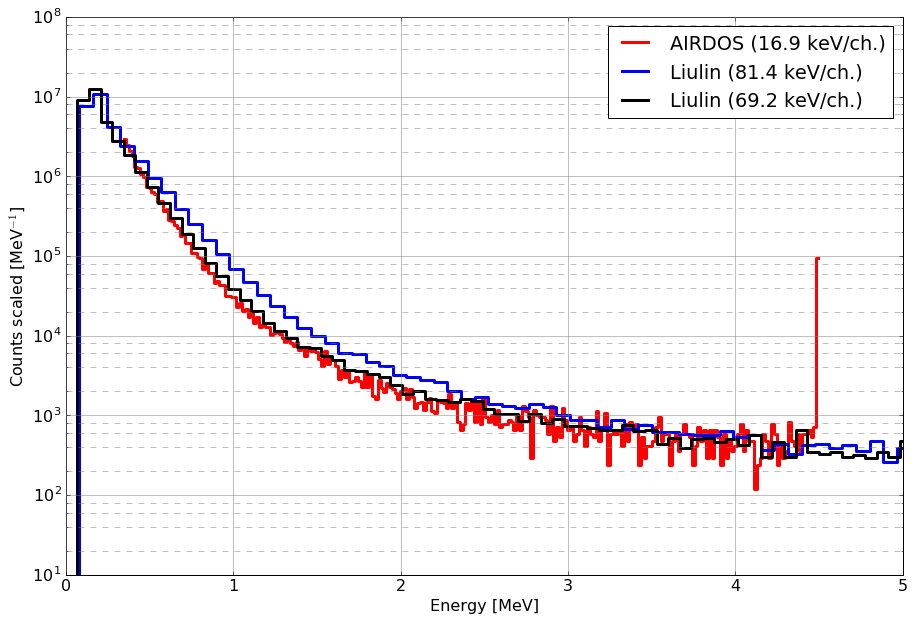

In [209]:
#a1x=a1[a1[0]>263]
#a2x=a2[a2[0]>265]
a1x.reset_index(inplace=True)
a1x['ch']=pd.to_numeric(a1x.index)
a2x.reset_index(inplace=True)
a2x['ch']=pd.to_numeric(a2x.index)

#ch. 239 is related to 4.39 MeV
a = 0.0169 #channel width AIRDOS
b = 4.39 - a * 239

w = 0.0814 

a1x['e'] = a * a1x['ch'] + b
a2x['e'] = a * a2x['ch'] + b
liulin['e'] = (liulin[0]) * w - w/2

plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 16})
plt.yscale('log')
#plt.xscale('log')
plt.xlim(0, 5)
plt.plot(a2x['e'],a2x[1]/a, c='r', lw=3, label='AIRDOS (16.9 keV/ch.)', drawstyle='steps-mid')
#plt.plot(liulin['e'],liulin[1]/w, c='black', linestyle=':', lw=3, label='Liulin (81.4 keV/ch.)', drawstyle='steps-mid')
plt.plot(liulin['e'],liulin[1]/w, c='blue', lw=3, label='Liulin (81.4 keV/ch.)', drawstyle='steps-mid')

w = 0.0814 
w = 0.0692
liulin['e'] = (liulin[0]) * w - w/2
plt.plot(liulin['e'],liulin[1]/w, c='black', lw=3, label='Liulin (69.2 keV/ch.)', drawstyle='steps-mid')


plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts scaled [MeV$^{-1}$]')
plt.legend()
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='--')

plt.savefig("musala.pdf", format="pdf", bbox_inches='tight')

In [852]:
from_energy = 0.35
to_energy = 4.5

a1x['dose']=a1x[1]*a1x['e']
a2x['dose']=a2x[1]*a1x['e']
liulin['dose']=liulin[1]*liulin['e']

a1_particles = a1x.loc[(a1x['e']>=from_energy)][1].sum()
a2_particles = a2x.loc[(a2x['e']>=from_energy)][1].sum()
liulin_particles = liulin.loc[(liulin['e']>=from_energy)][1].sum()

a1_dose = a1x.loc[(a1x['e']>=from_energy)&(a1x['e']<=to_energy)]['dose'].sum()
a2_dose = a2x.loc[(a2x['e']>=from_energy)&(a2x['e']<=to_energy)]['dose'].sum()
liulin_dose = liulin.loc[(liulin['e']>=from_energy)&(liulin['e']<=to_energy)]['dose'].sum()

a1norm = a1_dose/a1_particles
a2norm = a2_dose/a2_particles
liulinnorm = liulin_dose/liulin_particles

print 'Liulin','AIRDOS'
print liulin_particles, a1_particles, a2_particles
print liulin_particles/(a1_particles/100),'%', liulin_particles/(a2_particles/100),'%'
print liulin_dose, a1_dose, a2_dose
print liulin_dose/(a1_dose/100),'%', liulin_dose/(a2_dose/100),'%'
print liulinnorm, a1norm, a2norm
print liulinnorm/(a1norm/100),'%', liulinnorm/(a2norm/100),'%'
 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Liulin AIRDOS
352951 462581 365417
76 % 96 %
186670.287 225700.6802 188565.8866
82.7070112658 % 98.9947282437 %
0.528884425883 0.487916019465 0.51602932157
108.396610233 % 102.491157726 %


In [696]:
a1x.to_csv('a1.csv')
a2x.to_csv('a2.csv')
liulin.to_csv('liulin.csv')


## Liulin Musala

In [211]:
df = pd.read_csv('./data/Musala/liulin.txt', header = None, sep = ',', skiprows = 1) # read Liulin data


(0, 300)

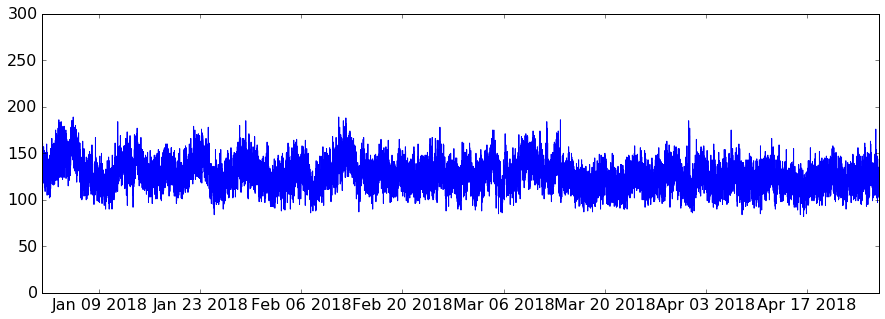

In [212]:
df['date'] = pd.to_datetime(df[0])
df = df.set_index(['date'])
df['flux'] = df[range(4,259)].sum(axis=1)

liulin = df.loc['2018-01-01 00:00:00':'2018-04-27 00:00:00']
#liulin = df.loc['2018-01-01 00:00:00':]
liulin = liulin.loc[(liulin['flux']<190)&(liulin['flux']>80)]

plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 16})

plt.plot(liulin['flux'])
plt.ylim(0, 300)


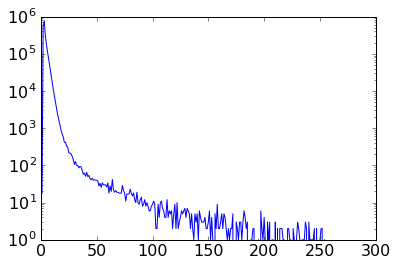

In [213]:
ener = liulin.ix[:,4:260].sum()

ener = ener.reset_index()
ener[1]=ener.index+1
ener = ener.set_index(1)

plt.plot(ener[0])
plt.yscale('log')

ener.to_csv('liulin.csv')

## AIRDOS Musala

In [214]:
# read AIRDOS data
df = pd.read_csv('./data/Musala/A2.txt', sep=',', header=None, comment='*', parse_dates=[0], error_bad_lines=False)


Skipping line 12360: expected 521 fields, saw 917

Skipping line 17177: expected 521 fields, saw 562

Skipping line 781443: expected 521 fields, saw 884



/usr/lib/python2.7/dist-packages/pandas/core/index.py:2864: FutureWarning:

In the future, 'NAT <= x' and 'x <= NAT' will always be False.



(0, 300)

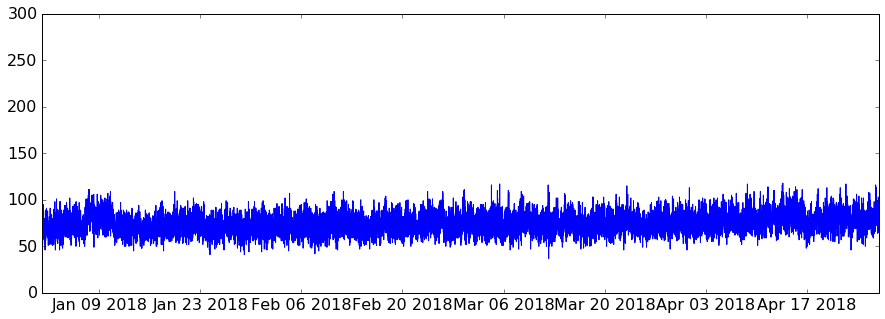

In [215]:
#df['date'] = pd.to_datetime(df[0])
df['date'] = pd.to_datetime(float64(df[0]),unit='s')
df = df.set_index(['date'])
df['flux'] = df[range(267,515)].sum(axis=1)

airdos = df.loc['2018-01-01 00:00:00':'2018-04-27 00:00:00']
airdos = airdos.loc[(airdos['flux']<12)]
airdos = airdos.resample('10 min', how='sum')
airdos = airdos.loc[(airdos['flux']<120)]

plt.figure(figsize=(15,5))

matplotlib.rcParams.update({'font.size': 16})

plt.plot(airdos['flux'])
plt.ylim(0, 300)


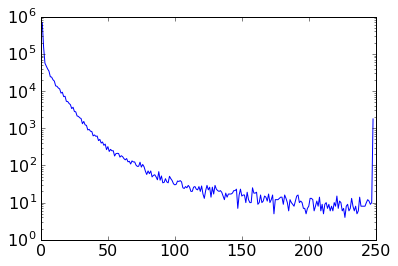

In [216]:
enera = airdos.ix[:,265:513].sum()

enera = enera.reset_index()
enera[1]=enera.index+1
enera = enera.set_index(1)

plt.plot(enera[0])
plt.yscale('log')

airdos.to_csv('A2_10min.csv')
enera.to_csv('A2.csv')

## Spectra Musala

In [217]:
#a1 = pd.read_table('A2.csv', sep=',', header=None, skiprows=1, engine='python' )
a2 = pd.read_table('A2.csv', sep=',', header=None,  skiprows=1, engine='python' )
liulin = pd.read_table('liulin.csv', sep=',', header=None,  skiprows=1, engine='python' )
#a1[0]=pd.to_numeric(a1.index)
#a1[1]=pd.to_numeric(a1[0])
a2[0]=pd.to_numeric(a2.index)
a2[1]=pd.to_numeric(a2[0])+256-247
liulin[1] = pd.to_numeric(liulin.index)+1


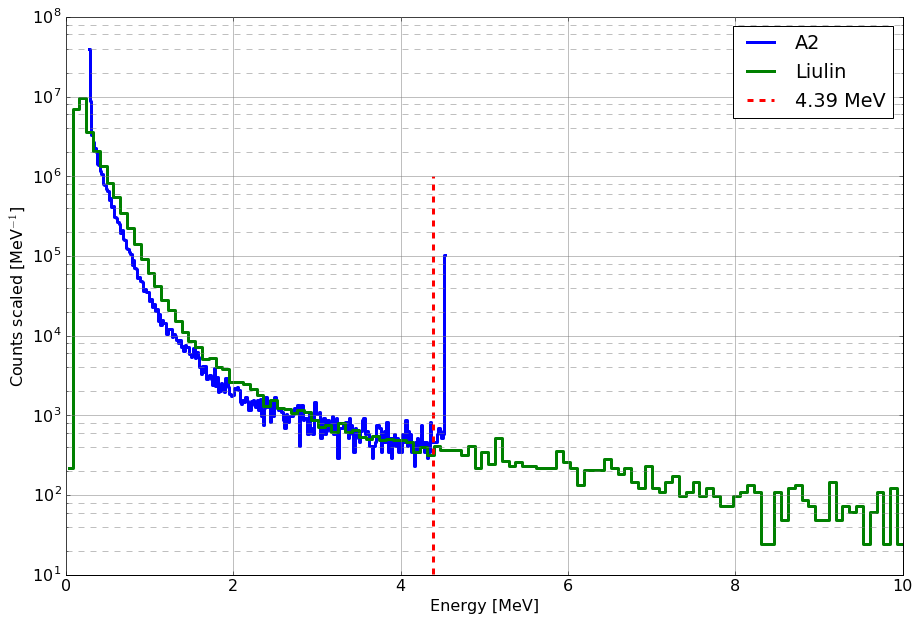

In [218]:
#a2x=a2[a2[0]>265]
a2x=a2
#a2x.reset_index(inplace=True)
a2x['ch']=pd.to_numeric(a2x[1])

#ch. 248 is related to 4.39 MeV
a = 0.0172 #channel width AIRDOS
b = 4.39 - a * 248

w = 0.0814 #0.0692 #0.0814 #channel width Liulin
#w = 0.0692 #0.0814 #channel width Liulin

a2x['e'] = a * a2x['ch'] + b
liulin['ch'] = liulin[1]
liulin['e'] = (liulin['ch']) * w - w/2

plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 16})
plt.yscale('log')
plt.xlim(0, 10)
plt.plot(a2x['e'],a2x[2]/a, lw=3, label='A2', drawstyle='steps-mid')
plt.plot(liulin['e'],liulin[2]/w, lw=3, label='Liulin', drawstyle='steps-mid')

line = pd.DataFrame()
line['x']=[4.39,4.39]
line['y']=[0,1e6]
plt.plot(line['x'],line['y'],lw=3, linestyle='--', label='4.39 MeV')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts scaled [MeV$^{-1}$]')
plt.legend()
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='--')


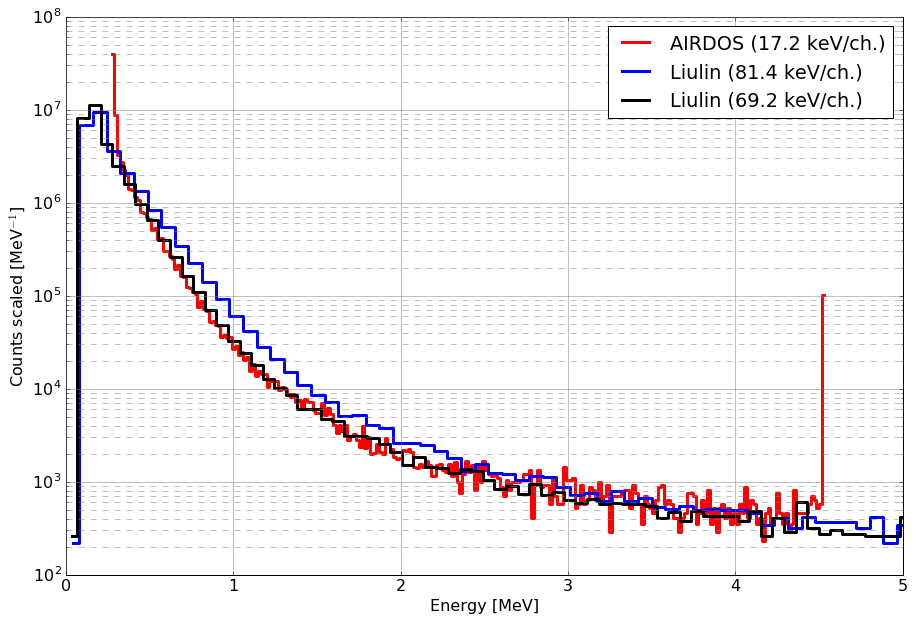

In [229]:
#ch. 248 is related to 4.39 MeV
a = 0.0172 #channel width AIRDOS
b = 4.39 - a * 248

w = 0.0814 

#a1x['e'] = a * a1x['ch'] + b
a2x['e'] = a * a2x['ch'] + b
liulin['e'] = (liulin[0]) * w - w/2

plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 16})
plt.yscale('log')
#plt.xscale('log')
plt.xlim(0, 5)
plt.ylim(100, 1e8)
plt.plot(a2x['e'],a2x[2]/a, c='r', lw=3, label='AIRDOS (17.2 keV/ch.)', drawstyle='steps-mid')
plt.plot(liulin['e'],liulin[2]/w, c='blue', lw=3, label='Liulin (81.4 keV/ch.)', drawstyle='steps-mid')

w = 0.0814 
w = 0.0692
liulin['e'] = (liulin[0]) * w - w/2
plt.plot(liulin['e'],liulin[2]/w, c='black', lw=3, label='Liulin (69.2 keV/ch.)', drawstyle='steps-mid')


plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts scaled [MeV$^{-1}$]')
plt.legend()
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='--')

plt.savefig("musala.pdf", format="pdf", bbox_inches='tight')

In [227]:
from_energy = 0.3
to_energy = 4.5

a2x['dose']=a2x[2]*a2x['e']
liulin['dose']=liulin[2]*liulin['e']

a2_particles = a2x.loc[(a2x['e']>=from_energy)][2].sum()
liulin_particles = liulin.loc[(liulin['e']>=from_energy)][2].sum()

a2_dose = a2x.loc[(a2x['e']>=from_energy)&(a2x['e']<=to_energy)]['dose'].sum()
liulin_dose = liulin.loc[(liulin['e']>=from_energy)&(liulin['e']<=to_energy)]['dose'].sum()

a2norm = a2_dose/a2_particles
liulinnorm = liulin_dose/liulin_particles

print 'Liulin','AIRDOS'
print 'couns', liulin_particles, a2_particles
print liulin_particles/(a2_particles/100),'%'
print 'dose', liulin_dose, a2_dose
print liulin_dose/(a2_dose/100),'%'
#print liulinnorm, a2norm
#print liulinnorm/(a2norm/100),'%'
 
#Value recorded by Liulin is~215987.2~MeV (in 478068~events), 14.2\% higher than the 189164.7~MeV (in 408882~events) recorded by AIRDOS.

Liulin AIRDOS
couns 478068 408882
116 %
dose 215987.1784 189164.7008
114.179430669 %


In [225]:
a2x

,0,1,2,ch,e,dose
0,0,9,687210,9,0.2792,191869.0320
1,1,10,149842,10,0.2964,44413.1688
2,2,11,55840,11,0.3136,17511.4240
3,3,12,46899,12,0.3308,15514.1892
4,4,13,39226,13,0.3480,13650.6480
5,5,14,34196,14,0.3652,12488.3792
6,6,15,24238,15,0.3824,9268.6112
7,7,16,23587,16,0.3996,9425.3652
8,8,17,20056,17,0.4168,8359.3408
9,9,18,18478,18,0.4340,8019.4520


## Energy calibration

In [61]:
fto = './data/DATALOG.TXT' #  File to Open
l=[]
l.extend(range(0,520))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*',engine='python' )

#
''' DEBUG
df = df.reset_index(drop=True)
df.drop(df[df.index > 100].index, inplace=True)
'''#'''

df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
#df.drop(df[df[0]=='$CANDY'].index, inplace=True)

# Convert strings to numbers
#df = df.apply(pd.to_numeric, errors='ignore')

#df.iloc[:,0:13]

#df

450


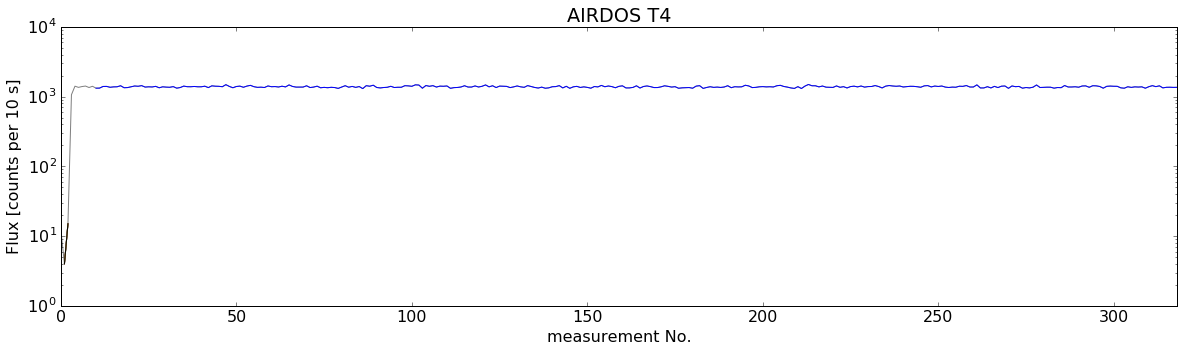

In [65]:
rc = df.loc[df[0]=='$CANDY2']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

#rc.to_csv('ble.txt')

#rc['sum'] = rc[range(256,516)].sum(axis=1)
rc['sum'] = rc[range(265,513)].sum(axis=1)
#rc['sum']

plt.figure(figsize=(20,5))

#rc['sum'].plot()
rc.ix[0:,'sum'].plot(c='gray')
plt.yscale('log')

#plt.ylim([0,50])

# T4 ABSjests e1 = [700,1100]
e1 = [10,450]
e2 = [1,2]
e3 = [1,2]
e4 = [1,2]
e5 = [1,2]
e6 = [1,2]
e7 = [1,2]
e8 = [1,1]
'''T4 calibration
e1 = [1,20]
e2 = [60,190]
e3 = [220,1000]
e4 = [2900,2950]
e5 = [3035,3090]
e6 = [2400,2440]
e7 = [3100,3150]
e8 = [1,1]
#'''

rc.ix[e1[0]:e1[1],'sum'].plot()
rc.ix[e2[0]:e2[1],'sum'].plot()
rc.ix[e3[0]:e3[1],'sum'].plot()
rc.ix[e4[0]:e4[1],'sum'].plot()
rc.ix[e5[0]:e5[1],'sum'].plot()
rc.ix[e6[0]:e6[1],'sum'].plot()
rc.ix[e7[0]:e7[1],'sum'].plot()
rc.ix[e8[0]:e8[1],'sum'].plot()

plt.title('AIRDOS T4')
#plt.title('AIRDOS A005')
plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 10 s]')

print e1[1]

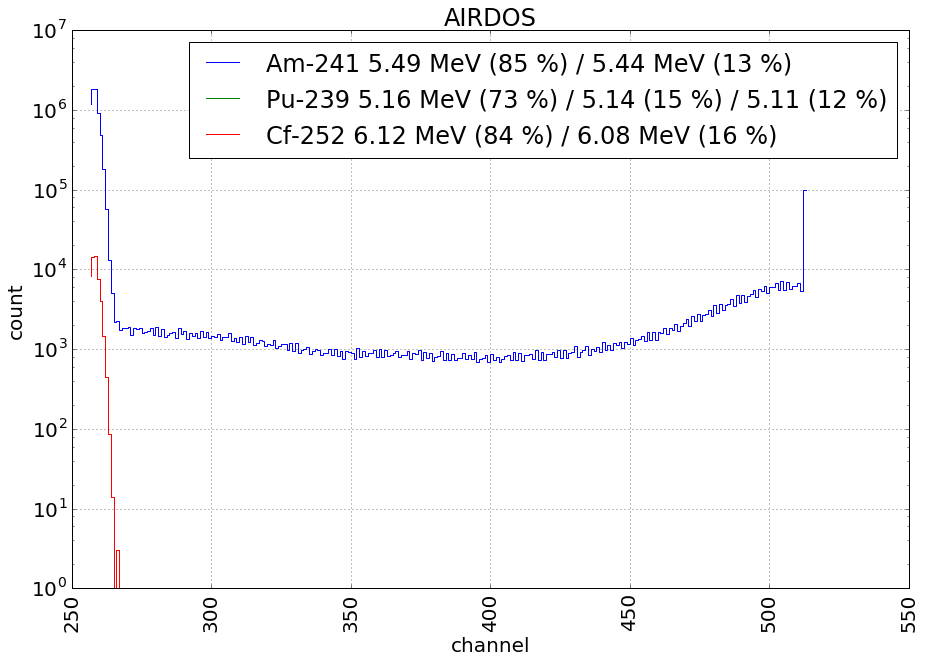

In [66]:
matplotlib.rcParams.update({'font.size': 20})

'''
plt.figure(figsize=(20,5))
rc['sum'][91:154].plot(c='blue')
rc['sum'][155:235].plot(c='red')
rc['sum'][236:296].plot(c='green')
rc['sum'][300:350].plot(c='yellow')
'''

LOW_ENERGY = 257

ener1 = rc.ix[e1[0]:e1[1],LOW_ENERGY:514].sum()
ener2 = rc.ix[e2[0]:e2[1],LOW_ENERGY:514].sum()
ener3 = rc.ix[e3[0]:e3[1],LOW_ENERGY:514].sum()
ener4 = rc.ix[e4[0]:e4[1],LOW_ENERGY:514].sum()
ener5 = rc.ix[e5[0]:e5[1],LOW_ENERGY:514].sum()
ener6 = rc.ix[e6[0]:e6[1],LOW_ENERGY:514].sum()
ener7 = rc.ix[e7[0]:e7[1],LOW_ENERGY:514].sum()
ener8 = rc.ix[e8[0]:e8[1],LOW_ENERGY:514].sum()
 
plt.figure(figsize=(15,10))
plt.yscale('log')


#plt.plot(ener3, label='9 V Glass', drawstyle='steps-pre')
#plt.plot(ener2, label='GVA-PRG', drawstyle='steps-pre')
#plt.plot(enr1, label='p+', drawstyle='steps-pre')
plt.plot(ener1, label='Am-241 5.49 MeV (85 %) / 5.44 MeV (13 %)', drawstyle='steps-pre')
plt.plot(ener2, label='Pu-239 5.16 MeV (73 %) / 5.14 (15 %) / 5.11 (12 %)', drawstyle='steps-pre')
plt.plot(ener3, label='Cf-252 6.12 MeV (84 %) / 6.08 MeV (16 %)', drawstyle='steps-pre')
#plt.plot(ener1, label='e1',  drawstyle='steps-pre')
#plt.plot(ener2, label='e2',  drawstyle='steps-pre')
#plt.plot(ener3, label='e3',  drawstyle='steps-pre')
#plt.plot(ener4, label='e4',  drawstyle='steps-pre')
#plt.plot(ener5, label='e5',  drawstyle='steps-pre')
#plt.plot(ener6, label='e6',  drawstyle='steps-pre')
#plt.plot(ener7, label='e7',  drawstyle='steps-pre')
#plt.plot(ener8, label='e8',  drawstyle='steps-pre')
#plt.plot(ener3*100, label='e3*100',  drawstyle='steps-pre')
#plt.plot(ener4*1000, label='e4*1000',  drawstyle='steps-pre')
#plt.plot(ener5*10000, label='e5*10000',  drawstyle='steps-pre')
#plt.plot(ener5, label='Am-241 5.49 MeV colim.',  drawstyle='steps-pre')
#plt.ylim([0,5000])
#plt.xlim([250,300])
plt.legend()
plt.title('AIRDOS')
#plt.title('AIRDOS T4 Alpha Spectrum')
plt.xlabel('channel')
plt.ylabel('count')
#plt.xticks(range(500,1030,10))
plt.xticks(rotation=90)
plt.grid()


In [71]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

data = [
    go.Scatter(
        x=ener1.index,
        y=ener1,
        name='p+ deg. 0',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=ener1.index,
        y=ener4,
        name='p+ deg. 3',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=ener1.index,
        y=ener3,
        name='p+ deg. 4',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=ener1.index,
        y=ener2,
        name='p+ deg. 2,4',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=ener1.index,
        y=ener7,
        name='Pu 5.16 MeV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=ener1.index,
        y=ener5,
        name='Am 5.49 MeV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),
    go.Scatter(
        x=ener1.index,
        y=ener6,
        name='Cf 6.12 MeV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),
    go.Scatter(
        x=ener1.index,
        y=ener8,
        name='Am 1 cm',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),
    ]

layout = go.Layout(
    title='AIRDOS',
    font=dict(family='Courier New, monospace', size=18, color='#7f7f7f'),
    yaxis=dict(
        title='counts',
        #type='log',
        range = [0,10000]

    ),
    xaxis=dict(
        title='Ch. [-]',
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='ble')


185
3263


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



(0.1, 7000)

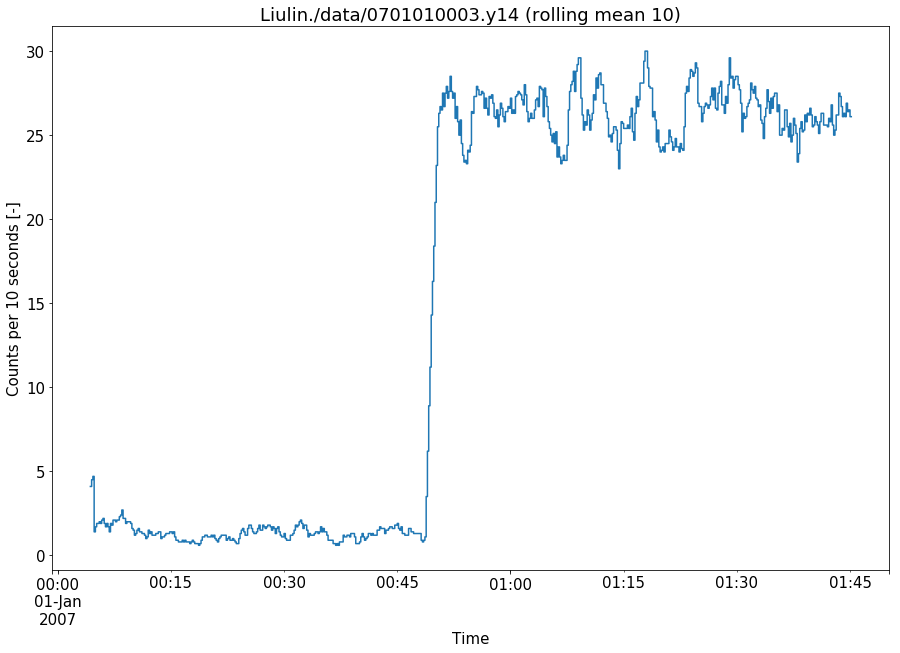

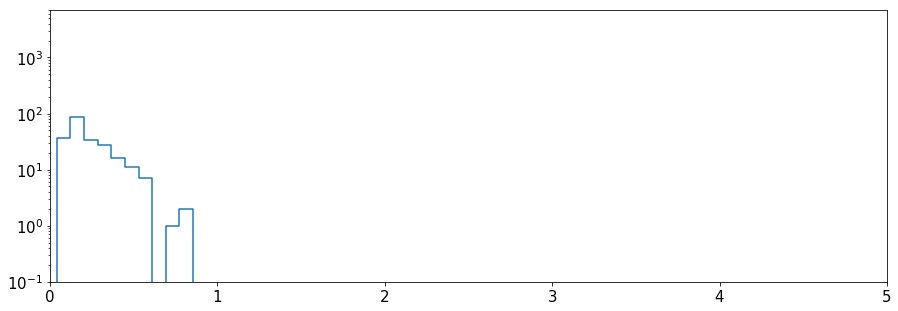

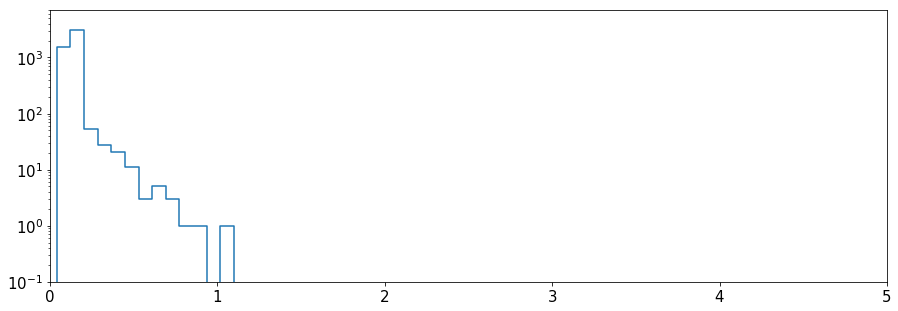

In [55]:
liulin_data = pd.DataFrame(index = pd.date_range(date_object, freq=exposition, periods=len(liulin)).tolist(), data = liulin.as_matrix())
liulin_data['flux'] = liulin_data[range(0,256)].sum(axis=1)
#liulin_data = liulin_data.loc['2017-11-29 12:00:00':'2017-11-29 15:30:00']

WINDOW = 10
liulin_data['flux'] = liulin_data['flux'].rolling(WINDOW).mean()
liulin_data['flux'] = liulin_data['flux'] 

#liulin_data
plt.figure(figsize=(15, 10))
matplotlib.rcParams.update({'font.size': 15})
liulin_data['flux'].plot(drawstyle='steps')
plt.title('Liulin' + filename + ' (rolling mean ' + str(WINDOW) + ')')
plt.ylabel('Counts per 10 seconds [-]')
plt.xlabel('Time')
#plt.ylim(0, 20)


# Liulin

e1 = ['2007-1-1 0:15:00','2007-1-1 0:45:00']

ener1 = liulin_data.ix[e1[0]:e1[1],0:256].sum()

print ener1[2:].sum()

ee = pd.DataFrame()
ee['1'] = ener1
ee['index'] = ener1.index
#e['x'] =  linspace(0.0407, 20.7977, 256)
ee['x'] =  linspace(0.0814/2, 20.7977, 256)

plt.figure(figsize=(15,5))
#ee['1'].plot(drawstyle='steps')
plt.plot(ee['x'],ee['1'],drawstyle='steps')
plt.yscale('log')
#plt.xscale('log')
plt.xlim(0, 5)
plt.ylim(0.1, 7000)

e1 = ['2007-1-1 1:00:00','2007-1-1 1:30:00']

ener1 = liulin_data.ix[e1[0]:e1[1],0:256].sum()

print ener1[2:].sum()

ee = pd.DataFrame()
ee['1'] = ener1
ee['index'] = ener1.index
#e['x'] =  linspace(0.0407, 20.7977, 256)
ee['x'] =  linspace(0.0814/2, 20.7977, 256)

plt.figure(figsize=(15,5))
#ee['1'].plot(drawstyle='steps')
plt.plot(ee['x'],ee['1'],drawstyle='steps')
plt.yscale('log')
#plt.xscale('log')
plt.xlim(0, 5)
plt.ylim(0.1, 7000)
